<a href="https://colab.research.google.com/github/syenirasheila/FintechBanking-Prediction-Using-LogisticRegression-RandomForest/blob/main/FintechBanking_LogisticRegression_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PENGUMPULAN DATA

In [1]:
# Install libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_curve

In [2]:
#Koneksi ke Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Membaca data
train = pd.read_csv("/content/drive/MyDrive/Machine Learning 117/fintech_banking_dataset/train.csv", sep=';')
test = pd.read_csv("/content/drive/MyDrive/Machine Learning 117/fintech_banking_dataset/test.csv", sep=';')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
train.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [7]:
#Mengecek ringkasan statistik untuk fitur numerikal
train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [8]:
print("The number of clients that had a call duration of 0:", train[train['duration'] == 0].duration.count())

The number of clients that had a call duration of 0: 3


In [9]:
train[train['pdays'] == -1].previous.sum()

0

In [10]:
#Mengecek ringkasan statistik untuk fitur kategorikal
train.describe(include = 'object').T

,count,unique,top,freq
job,45211,12,blue-collar,9732
marital,45211,3,married,27214
education,45211,4,secondary,23202
default,45211,2,no,44396
housing,45211,2,yes,25130
loan,45211,2,no,37967
contact,45211,3,cellular,29285
month,45211,12,may,13766
poutcome,45211,4,unknown,36959
y,45211,2,no,39922


In [11]:
#Mengecek data yang kosong
print(train.isna().values.any())
print(train.isna().sum())

False
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [12]:
#Mengecek duplikasi data
print(train.duplicated().value_counts())

False    45211
dtype: int64


In [13]:
#Mengecek kesalahan pengejaan nama kolom
train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [14]:
#Menghilangkan white space
train.columns = train.columns.str.replace(' ', '')

In [15]:
#Konsistensi value
job_status = train["job"]
print(job_status.value_counts())

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64


In [16]:
marriage_status = train["marital"]
print(marriage_status.value_counts())

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64


In [17]:
education_status = train["education"]
print(education_status.value_counts())

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64


In [18]:
default_status = train["default"]
print(default_status.value_counts())

no     44396
yes      815
Name: default, dtype: int64


In [19]:
housing_status = train["housing"]
print(housing_status.value_counts())

yes    25130
no     20081
Name: housing, dtype: int64


In [20]:
contact = train["contact"]
print(contact.value_counts())

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64


In [21]:
contact = train["contact"]
print(contact.value_counts())

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64


In [22]:
loan_status = train["loan"]
print(loan_status.value_counts())

no     37967
yes     7244
Name: loan, dtype: int64


In [23]:
previous_status = train["previous"]
print(previous_status.value_counts())
36954

0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
20         8
23         8
18         6
22         6
24         5
27         5
21         4
29         4
25         4
30         3
38         2
37         2
26         2
28         2
51         1
275        1
58         1
32         1
40         1
55         1
35         1
41         1
Name: previous, dtype: int64


36954

In [24]:
poutcome_status = train["poutcome"]
print(poutcome_status.value_counts())

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64


In [25]:
y_status = train["y"]
print(y_status.value_counts())

no     39922
yes     5289
Name: y, dtype: int64


In [26]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [27]:
#Mengecek korelasi variabel untuk mencegah overfitting
print(train.corr())

               age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.097783 -0.009120 -0.004648  0.004760 -0.023758  0.001288
balance   0.097783  1.000000  0.004503  0.021560 -0.014578  0.003435  0.016674
day      -0.009120  0.004503  1.000000 -0.030206  0.162490 -0.093044 -0.051710
duration -0.004648  0.021560 -0.030206  1.000000 -0.084570 -0.001565  0.001203
campaign  0.004760 -0.014578  0.162490 -0.084570  1.000000 -0.088628 -0.032855
pdays    -0.023758  0.003435 -0.093044 -0.001565 -0.088628  1.000000  0.454820
previous  0.001288  0.016674 -0.051710  0.001203 -0.032855  0.454820  1.000000


<ipython-input-27-81362a1f505b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(train.corr())


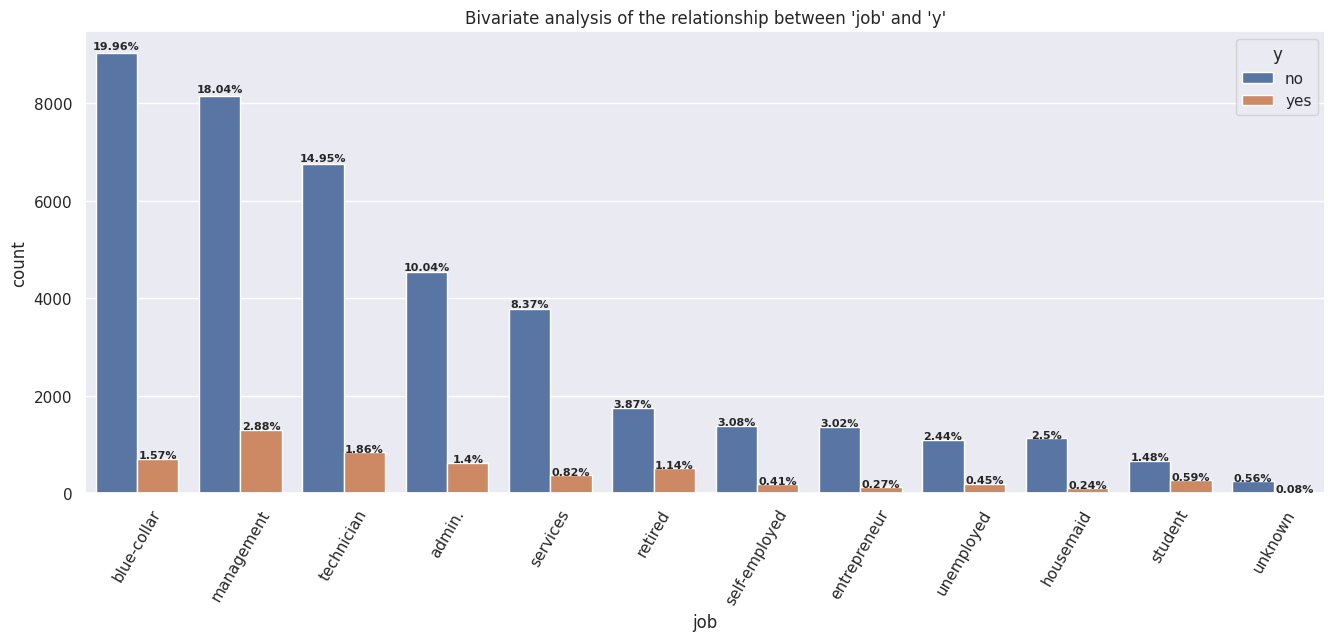

In [28]:
#Visualisasi data kategorikal dengan bar charts
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(16, 6)})
job = sns.countplot(x="job", data = train, hue = "y", order = train["job"].value_counts().index)
job.tick_params(axis='x', rotation=60)
for p in job.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    job.annotate(f'{round(height * 100 / train.shape[0], 2)}%', (x + width/2, y + height * 1.01), ha='center', weight = 'bold', fontsize = 8)
plt.title("Bivariate analysis of the relationship between 'job' and 'y'")
plt.show()

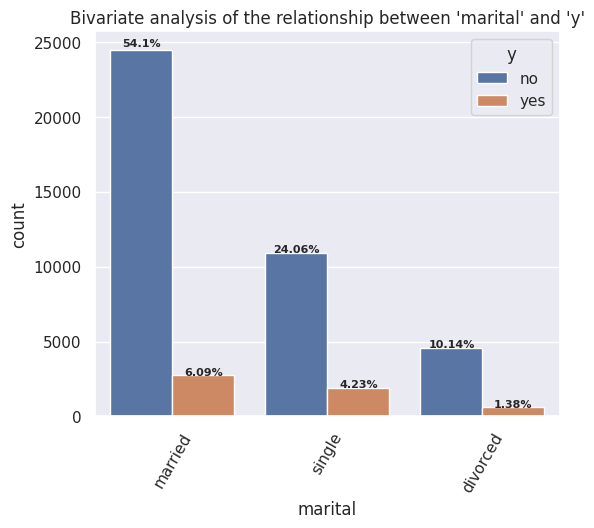

In [29]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(6, 5)})
marital = sns.countplot(x="marital", data = train, hue = "y", order = train["marital"].value_counts().index)
marital.tick_params(axis='x', rotation=60)
for p in marital.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    marital.annotate(f'{round(height * 100 / train.shape[0], 2)}%', (x + width/2, y + height * 1.01), ha='center', weight = 'bold', fontsize = 8)
plt.title("Bivariate analysis of the relationship between 'marital' and 'y'")
plt.show()

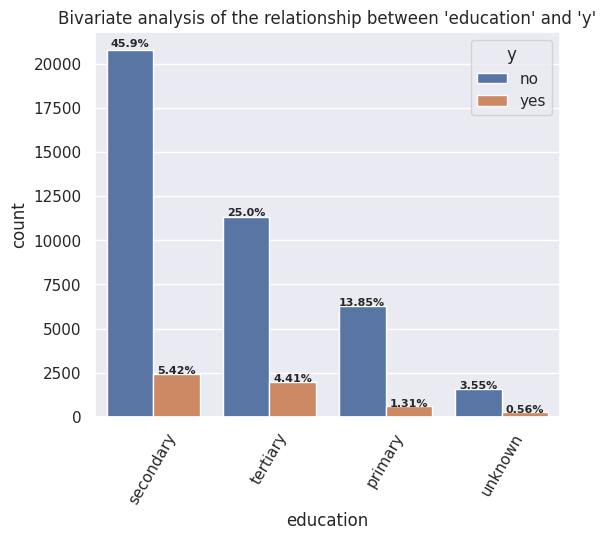

In [30]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(6, 5)})
education = sns.countplot(x="education", data = train, hue = "y", order = train["education"].value_counts().index)
education.tick_params(axis='x', rotation=60)
for p in education.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    education.annotate(f'{round(height * 100 / train.shape[0], 2)}%', (x + width/2, y + height * 1.01), ha='center', weight = 'bold', fontsize = 8)
plt.title("Bivariate analysis of the relationship between 'education' and 'y'")
plt.show()

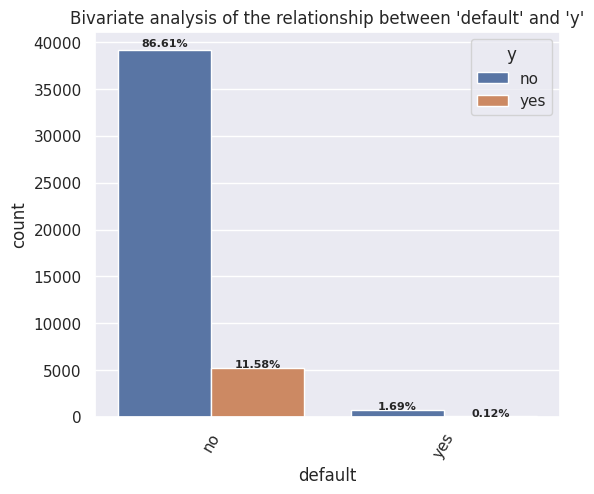

In [31]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(6, 5)})
default = sns.countplot(x="default", data = train, hue = "y", order = train["default"].value_counts().index)
default.tick_params(axis='x', rotation=60)
for p in default.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    default.annotate(f'{round(height * 100 / train.shape[0], 2)}%', (x + width/2, y + height * 1.01), ha='center', weight = 'bold', fontsize = 8)
plt.title("Bivariate analysis of the relationship between 'default' and 'y'")
plt.show()

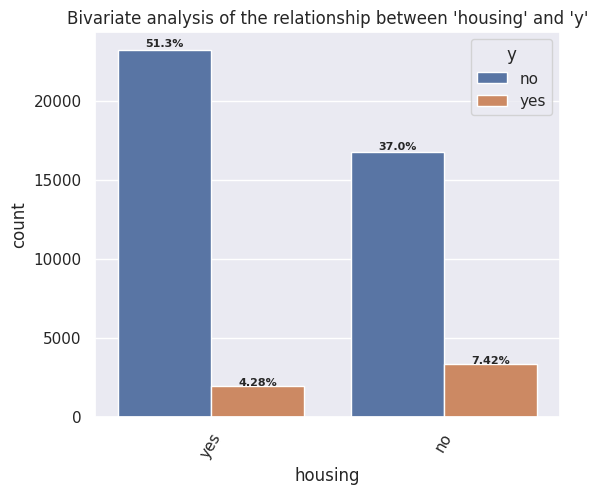

In [32]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(6, 5)})
housing = sns.countplot(x="housing", data = train, hue = "y", order = train["housing"].value_counts().index)
housing.tick_params(axis='x', rotation=60)
for p in housing.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    housing.annotate(f'{round(height * 100 / train.shape[0], 2)}%', (x + width/2, y + height * 1.01), ha='center', weight = 'bold', fontsize = 8)
plt.title("Bivariate analysis of the relationship between 'housing' and 'y'")
plt.show()

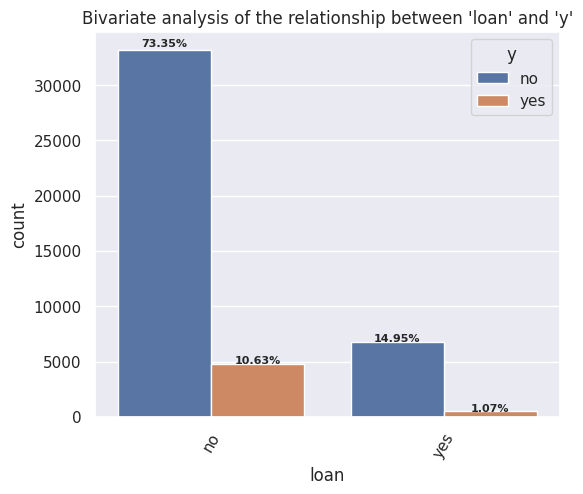

In [33]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(6, 5)})
loan = sns.countplot(x="loan", data = train, hue = "y", order = train["loan"].value_counts().index)
loan.tick_params(axis='x', rotation=60)
for p in loan.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    loan.annotate(f'{round(height * 100 / train.shape[0], 2)}%', (x + width/2, y + height * 1.01), ha='center', weight = 'bold', fontsize = 8)
plt.title("Bivariate analysis of the relationship between 'loan' and 'y'")
plt.show()

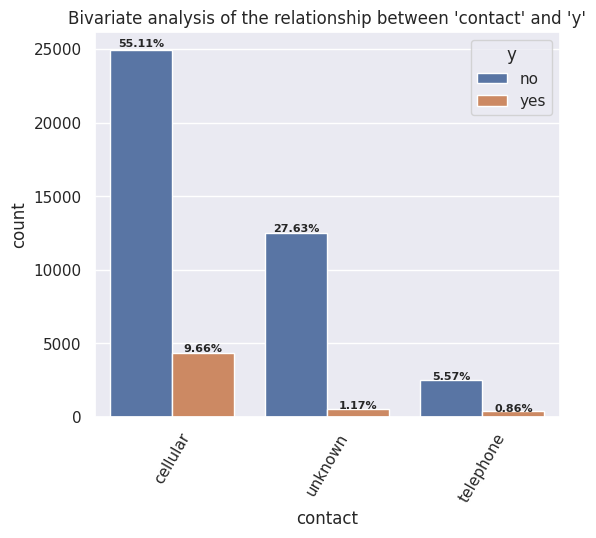

In [34]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(6, 5)})
contact = sns.countplot(x="contact", data = train, hue = "y", order = train["contact"].value_counts().index)
contact.tick_params(axis='x', rotation=60)
for p in contact.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    contact.annotate(f'{round(height * 100 / train.shape[0], 2)}%', (x + width/2, y + height * 1.01), ha='center', weight = 'bold', fontsize = 8)
plt.title("Bivariate analysis of the relationship between 'contact' and 'y'")
plt.show()

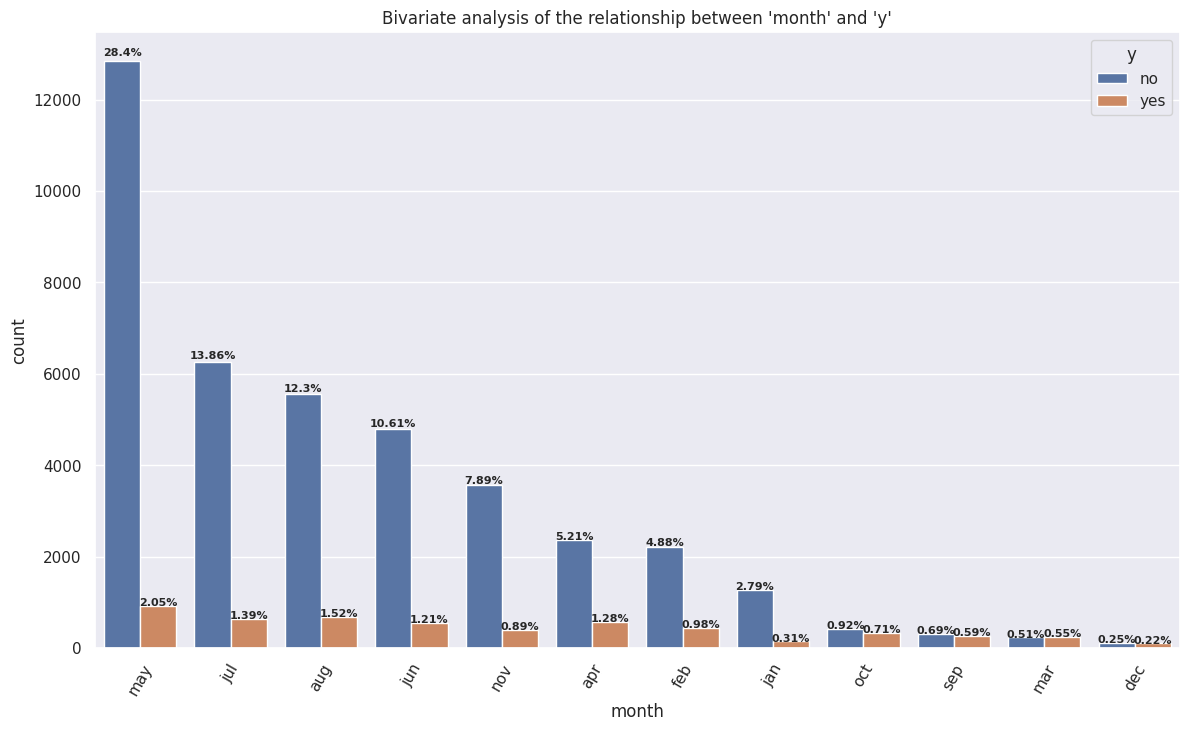

In [35]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(14, 8)})
month = sns.countplot(x="month", data = train, hue = "y", order = train["month"].value_counts().index)
month.tick_params(axis='x', rotation=60)
for p in month.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    month.annotate(f'{round(height * 100 / train.shape[0], 2)}%', (x + width/2, y + height * 1.01), ha='center', weight = 'bold', fontsize = 8)
plt.title("Bivariate analysis of the relationship between 'month' and 'y'")
plt.show()

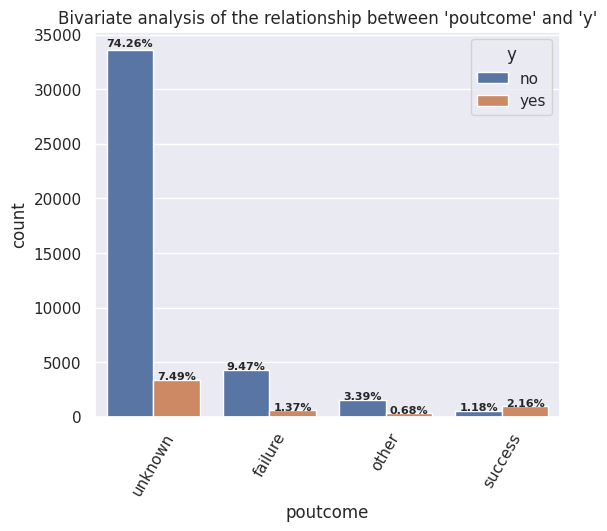

In [36]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(6, 5)})
poutcome = sns.countplot(x="poutcome", data = train, hue = "y", order = train["poutcome"].value_counts().index)
poutcome.tick_params(axis='x', rotation=60)
for p in poutcome.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    poutcome.annotate(f'{round(height * 100 / train.shape[0], 2)}%', (x + width/2, y + height * 1.01), ha='center', weight = 'bold', fontsize = 8)
plt.title("Bivariate analysis of the relationship between 'poutcome' and 'y'")
plt.show()

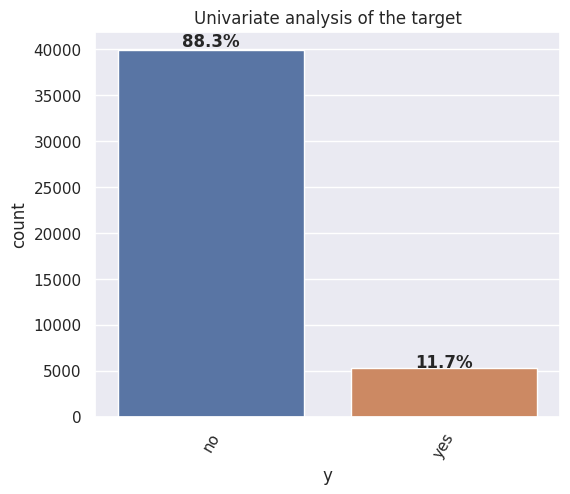

In [37]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(6, 5)})
target = sns.countplot(x="y", data = train, order = train["y"].value_counts().index)
target.tick_params(axis='x', rotation=60)
for p in target.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    target.annotate(f'{round(height * 100 / train.shape[0], 2)}%', (x + width/2, y + height * 1.01), ha='center', weight = 'bold', fontsize = 12)
plt.title("Univariate analysis of the target")
plt.show()

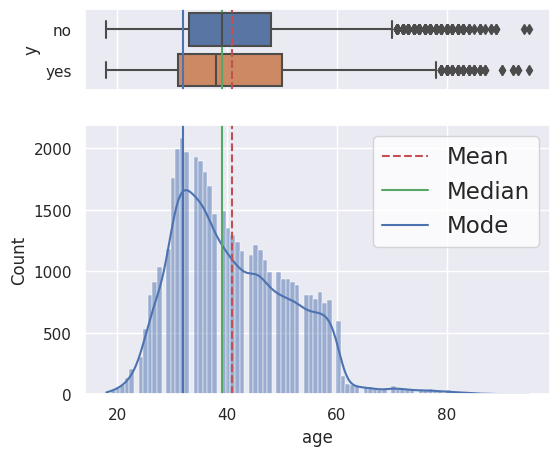

In [38]:
#Visualisasi numerikal data dengan box plot
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.3, 1)})
sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')
mean=train['age'].mean()
median=train['age'].median()
mode=train['age'].mode().values[0]

age = sns.boxplot(data=train, x="age", y="y", ax=ax_box, order = train["y"].value_counts().index)
# age.set(xscale="log")
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=train, x="age", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")
ax_hist.legend()
ax_box.set(xlabel='')
plt.show()

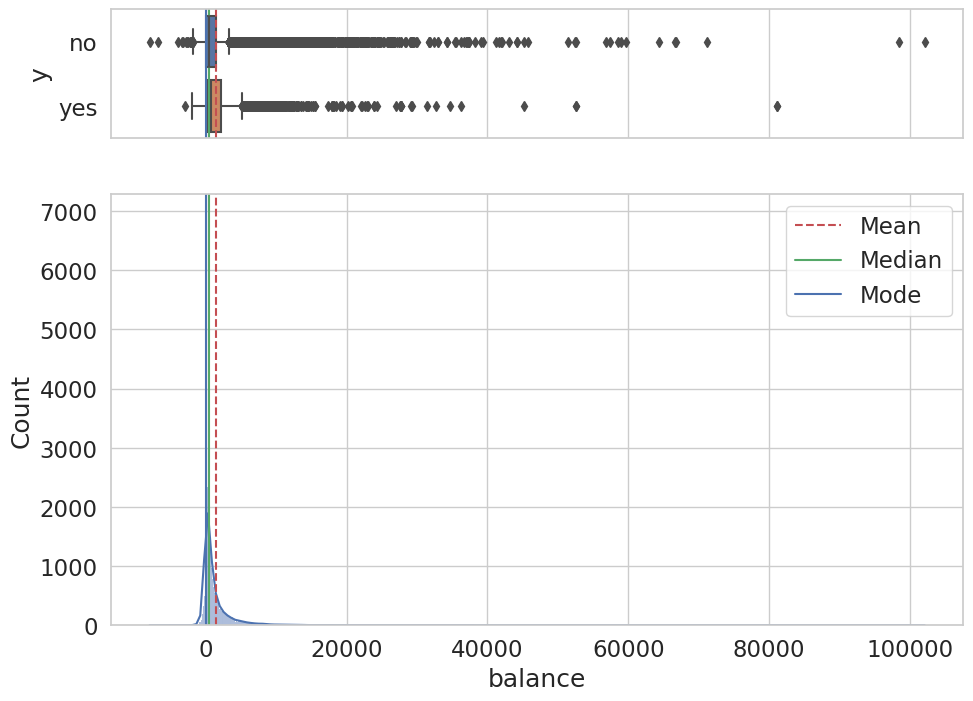

In [39]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.3, 1)})
sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')
mean=train['balance'].mean()
median=train['balance'].median()
mode=train['balance'].mode().values[0]

balance = sns.boxplot(data=train, x="balance", y="y", ax=ax_box, order = train["y"].value_counts().index)
# age.set(xscale="log")
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=train, x="balance", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")
ax_hist.legend()
ax_box.set(xlabel='')
plt.show()


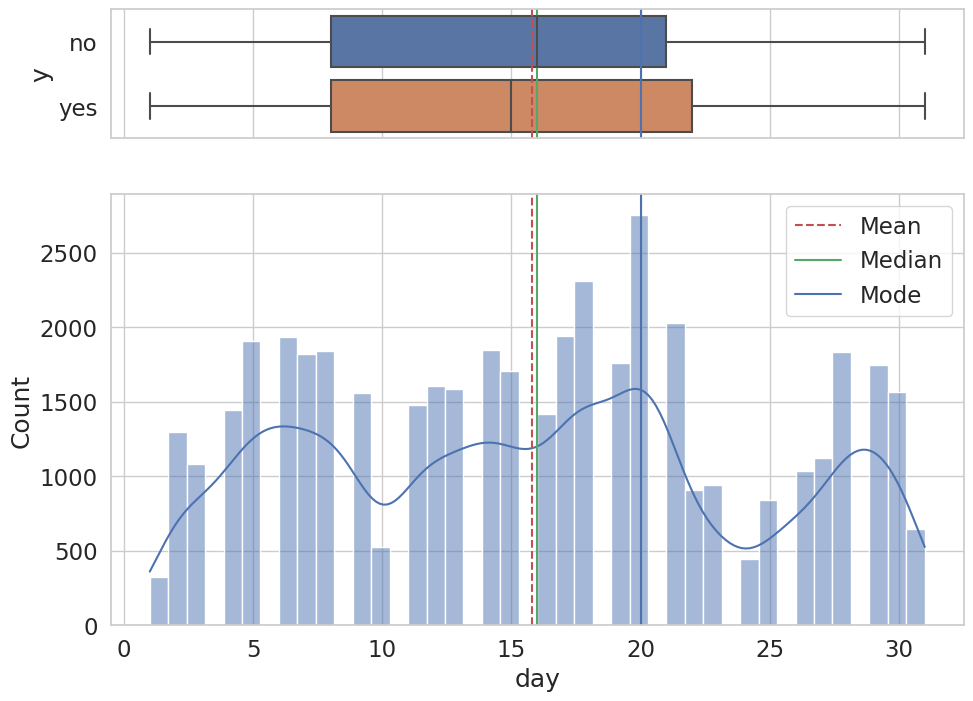

In [40]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.3, 1)})
sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')
mean=train['day'].mean()
median=train['day'].median()
mode=train['day'].mode().values[0]

day = sns.boxplot(data=train, x="day", y="y", ax=ax_box, order = train["y"].value_counts().index)
# age.set(xscale="log")
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=train, x="day", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")
ax_hist.legend()
ax_box.set(xlabel='')
plt.show()

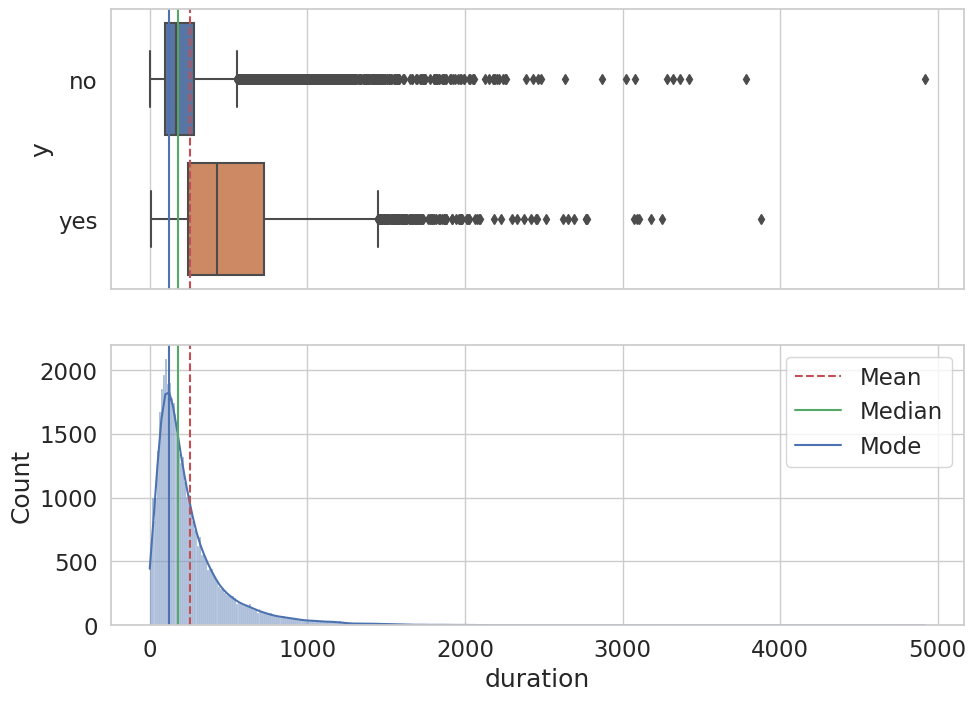

In [41]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True) # gridspec_kw= {"height_ratios": (0.3, 1)}
sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')
mean=train['duration'].mean()
median=train['duration'].median()
mode=train['duration'].mode().values[0]

duration = sns.boxplot(data=train, x="duration", y="y", ax=ax_box, order = train["y"].value_counts().index)
# age.set(xscale="log")
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=train, x="duration", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")
ax_hist.legend()
ax_box.set(xlabel='')
plt.show()

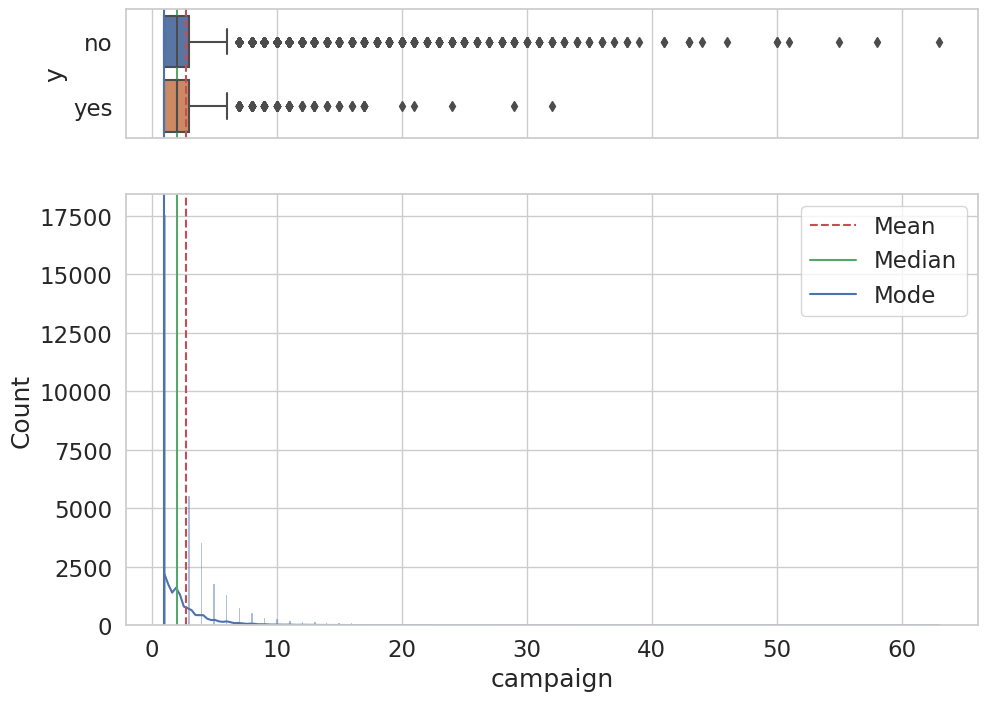

In [42]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.3, 1)})
sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')
mean=train['campaign'].mean()
median=train['campaign'].median()
mode=train['campaign'].mode().values[0]

campaign = sns.boxplot(data=train, x="campaign", y="y", ax=ax_box, order = train["y"].value_counts().index)
# age.set(xscale="log")
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=train, x="campaign", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")
ax_hist.legend()
ax_box.set(xlabel='')
plt.show()


40.19782796222158
-1.0


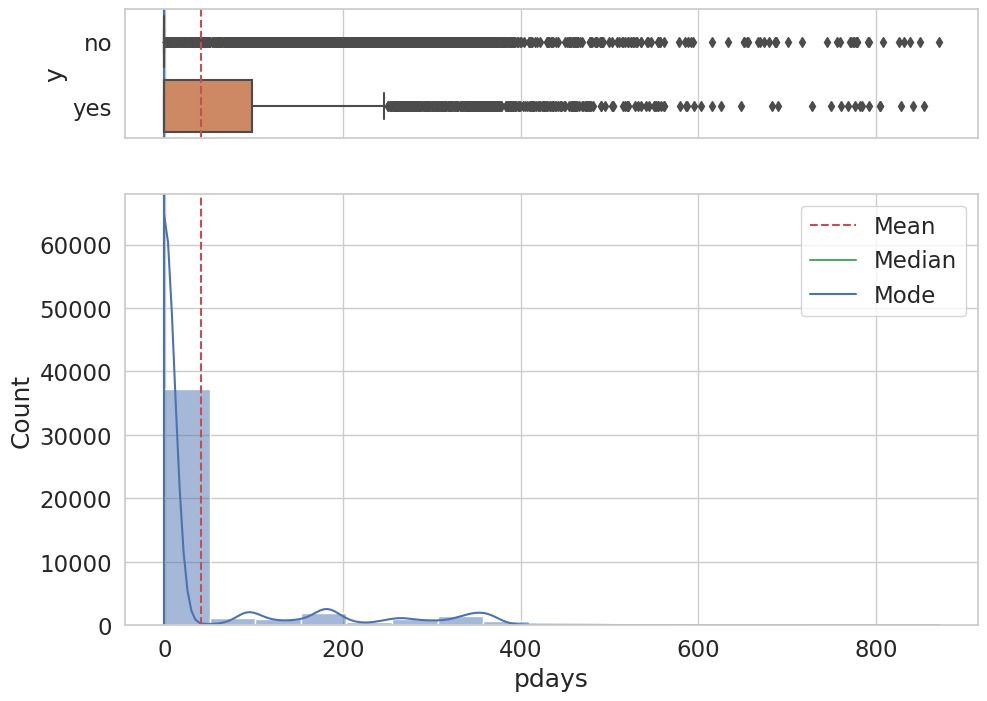

In [43]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.3, 1)})
sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')
mean=train['pdays'].mean()
print(mean)
median=train['pdays'].median()
print(median)
mode=train['pdays'].mode().values[0]

pdays = sns.boxplot(data=train, x="pdays", y="y", ax=ax_box, order = train["y"].value_counts().index)
# age.set(xscale="log")
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=train, x="pdays", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")
ax_hist.legend()
ax_box.set(xlabel='')
plt.show()

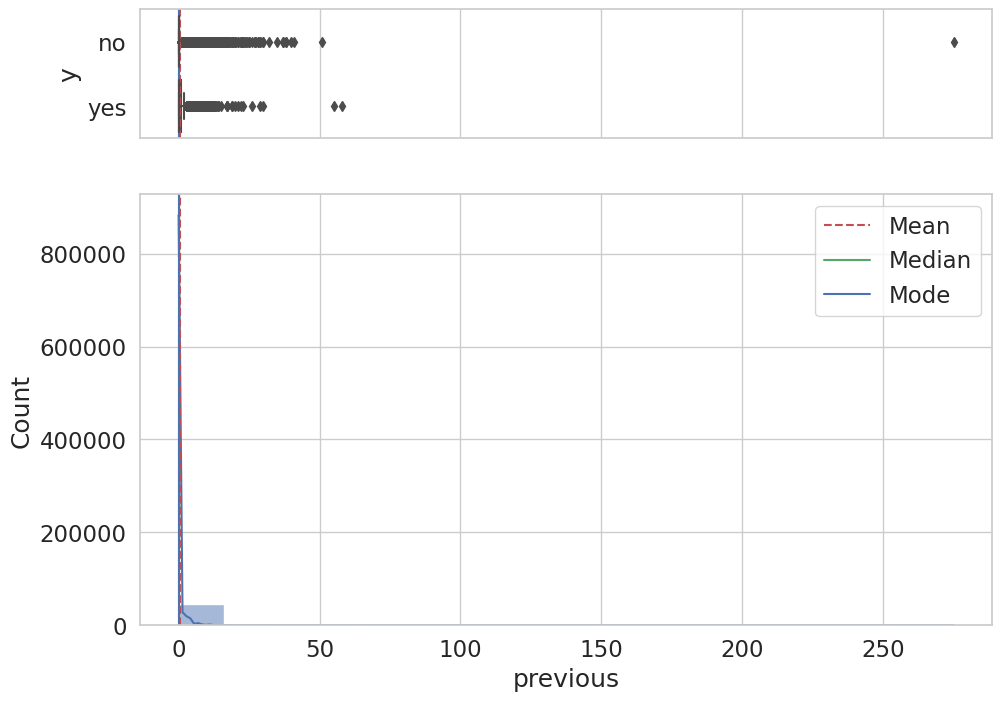

In [44]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.3, 1)})
sns.set(rc={'figure.figsize':(10,7)}, font_scale=1.5, style='whitegrid')
mean=train['previous'].mean()
median=train['previous'].median()
mode=train['previous'].mode().values[0]

previous = sns.boxplot(data=train, x="previous", y="y", ax=ax_box, order = train["y"].value_counts().index)
# age.set(xscale="log")
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=train, x="previous", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")
ax_hist.legend()
ax_box.set(xlabel='')
plt.show()

# PRE-PROCESSING DATA

In [45]:
train_copy = train.copy()
test_copy = test.copy()

train_copy['tst'] = 0
test_copy['tst'] = 1

train_test_concat = pd.concat([train_copy, test_copy], ignore_index=True)
del train_copy
del test_copy
gc.collect()

print(train_test_concat.shape)
print(train.shape)
print(test.shape)

(49732, 18)
(45211, 17)
(4521, 17)


In [46]:
#Menghilangkan noise
#Metode replace
train_test_concat["job"].replace(["unknown"],train_test_concat["job"].mode(),inplace = True)
train_test_concat["education"].replace(["unknown"],train_test_concat["education"].mode(),inplace = True)
train_test_concat["contact"].replace(["unknown"],train_test_concat["contact"].mode(),inplace = True)

In [47]:
#Drop fitur
train_test_concat.drop(columns = ["month", "previous", "day", "pdays"], inplace = True)
print(train_test_concat)

       age            job  marital  education default  balance housing loan  \
0       58     management  married   tertiary      no     2143     yes   no   
1       44     technician   single  secondary      no       29     yes   no   
2       33   entrepreneur  married  secondary      no        2     yes  yes   
3       47    blue-collar  married  secondary      no     1506     yes   no   
4       33    blue-collar   single  secondary      no        1      no   no   
...    ...            ...      ...        ...     ...      ...     ...  ...   
49727   33       services  married  secondary      no     -333     yes   no   
49728   57  self-employed  married   tertiary     yes    -3313     yes  yes   
49729   57     technician  married  secondary      no      295      no   no   
49730   28    blue-collar  married  secondary      no     1137      no   no   
49731   44   entrepreneur   single   tertiary      no     1136     yes  yes   

        contact  duration  campaign poutcome   y  t

In [48]:
#Encoding fitur kategorikal
train_test_concat['default'] = train_test_concat['default'].map({'yes': 1, 'no': 0})
train_test_concat['housing'] = train_test_concat['housing'].map({'yes': 1, 'no': 0})
train_test_concat['loan'] = train_test_concat['loan'].map({'yes': 1, 'no': 0})
train_test_concat['contact'] = train_test_concat['contact'].map({'telephone': 1, 'cellular': 0})
train_test_concat['y'] = train_test_concat['y'].map({'yes': 1, 'no': 0})
train_test_concat

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,poutcome,y,tst
0,58,management,married,tertiary,0,2143,1,0,0,261,1,unknown,0,0
1,44,technician,single,secondary,0,29,1,0,0,151,1,unknown,0,0
2,33,entrepreneur,married,secondary,0,2,1,1,0,76,1,unknown,0,0
3,47,blue-collar,married,secondary,0,1506,1,0,0,92,1,unknown,0,0
4,33,blue-collar,single,secondary,0,1,0,0,0,198,1,unknown,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,33,services,married,secondary,0,-333,1,0,0,329,5,unknown,0,1
49728,57,self-employed,married,tertiary,1,-3313,1,1,0,153,1,unknown,0,1
49729,57,technician,married,secondary,0,295,0,0,0,151,11,unknown,0,1
49730,28,blue-collar,married,secondary,0,1137,0,0,0,129,4,other,0,1


In [49]:
train_test_concat = pd.get_dummies(train_test_concat, columns=['job', 'marital', 'education', 'poutcome'])
train_test_concat

,age,default,balance,housing,loan,contact,duration,campaign,y,tst,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,0,261,1,0,0,...,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,0,151,1,0,0,...,0,0,1,0,1,0,0,0,0,1
2,33,0,2,1,1,0,76,1,0,0,...,0,1,0,0,1,0,0,0,0,1
3,47,0,1506,1,0,0,92,1,0,0,...,0,1,0,0,1,0,0,0,0,1
4,33,0,1,0,0,0,198,1,0,0,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,33,0,-333,1,0,0,329,5,0,1,...,0,1,0,0,1,0,0,0,0,1
49728,57,1,-3313,1,1,0,153,1,0,1,...,0,1,0,0,0,1,0,0,0,1
49729,57,0,295,0,0,0,151,11,0,1,...,0,1,0,0,1,0,0,0,0,1
49730,28,0,1137,0,0,0,129,4,0,1,...,0,1,0,0,1,0,0,1,0,0


# KLASIFIKASI LOGISTIC REGRESSION

In [50]:
y = train_test_concat["y"]
X = train_test_concat.drop("y",axis = 1)

X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

In [51]:
#Klasifikasi Logistic Regression 1
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

# EVALUASI LOGISTIC REGRESSION

In [52]:
#Evaluasi Logistic Regression 1
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print ("F1 score:", metrics.f1_score(y_test, y_pred))
print('Cross Validation mean:',(cross_val_score(logreg, X_train, y_train, cv=5, n_jobs=2, scoring = 'accuracy').mean()))

[[17226  1583]
 [  374   710]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     17600
           1       0.65      0.31      0.42      2293

    accuracy                           0.90     19893
   macro avg       0.79      0.64      0.68     19893
weighted avg       0.89      0.90      0.89     19893

Accuracy: 0.9016236867239733
Precision: 0.6549815498154982
Recall: 0.30963802878325336
F1 score: 0.4204915605567071
Cross Validation mean: 0.898957795578991


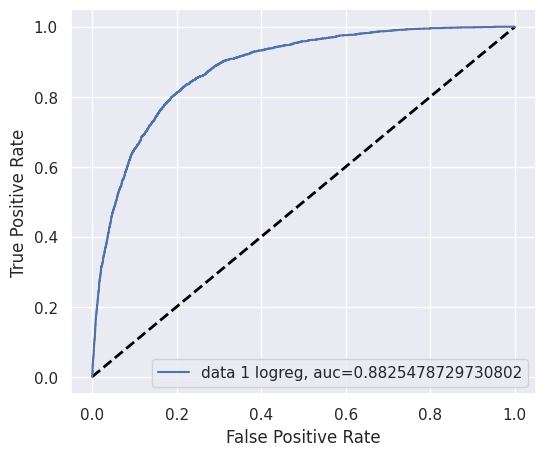

In [53]:
#AUC Logistic Regression 1
y_pred_proba = logreg.predict_proba(X_test)[:,1]
sns.set(rc = {'figure.figsize':(6, 5)})
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
plt.plot(fpr,tpr,label="data 1 logreg, auc="+str(auc))
plt.xlabel('False Positive Rate', fontsize = 12)
plt.ylabel('True Positive Rate', fontsize = 12)
plt.legend(loc=4)
plt.savefig('ROC.jpg', bbox_inches='tight')
plt.show()

In [54]:
#Oversampling
ROS = RandomOverSampler(sampling_strategy='minority', random_state=1)

X_train_ROS, y_train_ROS = ROS.fit_resample(X_train, y_train)
np.bincount(y_train_ROS)

array([26322, 26322])

In [55]:
#Klasifikasi Logistic Regression 2 dengan oversampling
logreg_oversampling = LogisticRegression(solver='liblinear')
logreg_oversampling.fit(X_train_ROS, y_train_ROS)
y_pred_oversampling = logreg_oversampling.predict(X_test)

In [56]:
#Evaluasi Logistic Regression 2 dengan oversampling
print(confusion_matrix(y_pred_oversampling, y_test))
print(classification_report(y_test, y_pred_oversampling))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_oversampling))
print("Precision:",metrics.precision_score(y_test, y_pred_oversampling))
print("Recall:",metrics.recall_score(y_test, y_pred_oversampling))
print ("F1 score:", metrics.f1_score(y_test, y_pred_oversampling))
print('Cross Validation mean:',(cross_val_score(logreg, X_train, y_train, cv=5, n_jobs=2, scoring = 'accuracy').mean()))

[[14648   514]
 [ 2952  1779]]
              precision    recall  f1-score   support

           0       0.97      0.83      0.89     17600
           1       0.38      0.78      0.51      2293

    accuracy                           0.83     19893
   macro avg       0.67      0.80      0.70     19893
weighted avg       0.90      0.83      0.85     19893

Accuracy: 0.8257678580405168
Precision: 0.3760304375396322
Recall: 0.7758395115569123
F1 score: 0.5065489749430524
Cross Validation mean: 0.898957795578991


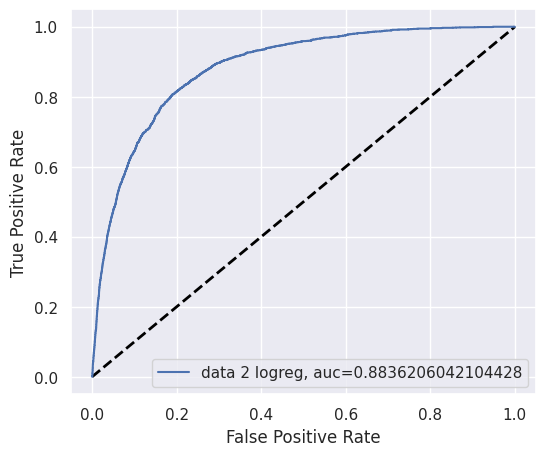

In [57]:
#AUC Logistic Regression 2
y_pred_proba = logreg_oversampling.predict_proba(X_test)[:,1]
sns.set(rc = {'figure.figsize':(6, 5)})
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
plt.plot(fpr,tpr,label="data 2 logreg, auc="+str(auc))
plt.xlabel('False Positive Rate', fontsize = 12)
plt.ylabel('True Positive Rate', fontsize = 12)
plt.legend(loc=4)
plt.savefig('ROC.jpg', bbox_inches='tight')
plt.show()

In [58]:
#Undersampling
RUS = RandomUnderSampler(sampling_strategy = 'majority', random_state = 1)

X_train_RUS, y_train_RUS = RUS.fit_resample(X_train, y_train)
np.bincount(y_train_RUS)

array([3517, 3517])

In [59]:
#Klasifikasi Logistic Regression 3 dengan undersampling
logreg_undersampling = LogisticRegression(solver='liblinear')
logreg_undersampling.fit(X_train_RUS, y_train_RUS)
y_pred_undersampling = logreg_undersampling.predict(X_test)

In [60]:
#Evaluasi Logistic Regression 3 dengan undersampling
print(confusion_matrix(y_pred_undersampling, y_test))
print(classification_report(y_test, y_pred_undersampling))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_undersampling))
print("Precision:",metrics.precision_score(y_test, y_pred_undersampling))
print("Recall:",metrics.recall_score(y_test, y_pred_undersampling))
print ("F1 score:", metrics.f1_score(y_test, y_pred_undersampling))
print('Cross Validation mean:',(cross_val_score(logreg, X_train, y_train, cv=5, n_jobs=2, scoring = 'accuracy').mean()))

[[14724   538]
 [ 2876  1755]]
              precision    recall  f1-score   support

           0       0.96      0.84      0.90     17600
           1       0.38      0.77      0.51      2293

    accuracy                           0.83     19893
   macro avg       0.67      0.80      0.70     19893
weighted avg       0.90      0.83      0.85     19893

Accuracy: 0.8283818428592973
Precision: 0.378967825523645
Recall: 0.765372873964239
F1 score: 0.5069324090121318
Cross Validation mean: 0.898957795578991


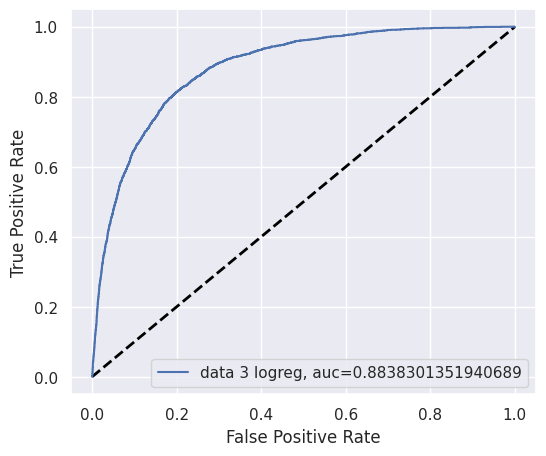

In [61]:
#AUC Logistic Regression 3
y_pred_proba = logreg_undersampling.predict_proba(X_test)[:,1]
sns.set(rc = {'figure.figsize':(6, 5)})
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
plt.plot(fpr,tpr,label="data 3 logreg, auc="+str(auc))
plt.xlabel('False Positive Rate', fontsize = 12)
plt.ylabel('True Positive Rate', fontsize = 12)
plt.legend(loc=4)
plt.savefig('ROC.jpg', bbox_inches='tight')
plt.show()

# KLASIFIKASI RANDOM FOREST

In [62]:
#Klasifikasi Random Forest 1
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train,y_train)
y_pred_rfc = rfc.predict(X_test)

# EVALUASI RANDOM FOREST

In [63]:
#Evaluasi Random Forest 1
print(confusion_matrix(y_pred_rfc, y_test))
print(classification_report(y_test, y_pred_rfc))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rfc))
print("Precision:",metrics.precision_score(y_test, y_pred_rfc))
print("Recall:",metrics.recall_score(y_test, y_pred_rfc))
print ("F1 score:", metrics.f1_score(y_test, y_pred_rfc))
print('Cross Validation mean:',(cross_val_score(rfc, X_train, y_train, cv=5, n_jobs=2, scoring = 'accuracy').mean()))

[[17118  1411]
 [  482   882]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     17600
           1       0.65      0.38      0.48      2293

    accuracy                           0.90     19893
   macro avg       0.79      0.68      0.71     19893
weighted avg       0.89      0.90      0.89     19893

Accuracy: 0.9048408988086262
Precision: 0.6466275659824047
Recall: 0.38464893153074575
F1 score: 0.4823625922887613
Cross Validation mean: 0.90113611907493


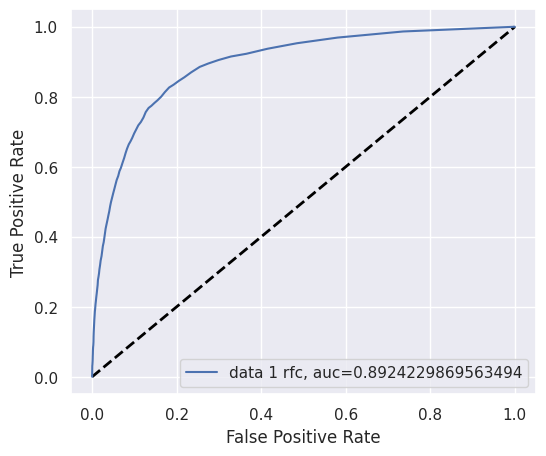

In [64]:
#AUC Random Forest 1
y_pred_proba = rfc.predict_proba(X_test)[:,1]
sns.set(rc = {'figure.figsize':(6, 5)})
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
plt.plot(fpr,tpr,label="data 1 rfc, auc="+str(auc))
plt.xlabel('False Positive Rate', fontsize = 12)
plt.ylabel('True Positive Rate', fontsize = 12)
plt.legend(loc=4)
plt.savefig('ROC.jpg', bbox_inches='tight')
plt.show()

In [65]:
#Klasifikasi Random Forest 2 dengan oversampling
rfc_oversampling = RandomForestClassifier(random_state=0)
rfc_oversampling.fit(X_train_ROS, y_train_ROS)
y_pred_rfc_oversampling = rfc_oversampling.predict(X_test)

In [66]:
#Evaluasi Random Forest 2 dengan oversampling
print(confusion_matrix(y_pred_rfc_oversampling, y_test))
print(classification_report(y_test, y_pred_rfc_oversampling))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rfc_oversampling))
print("Precision:",metrics.precision_score(y_test, y_pred_rfc_oversampling))
print("Recall:",metrics.recall_score(y_test, y_pred_rfc_oversampling))
print ("F1 score:", metrics.f1_score(y_test, y_pred_rfc_oversampling))
print('Cross Validation mean:',(cross_val_score(rfc, X_train, y_train, cv=5, n_jobs=2, scoring = 'accuracy').mean()))

[[16794  1129]
 [  806  1164]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95     17600
           1       0.59      0.51      0.55      2293

    accuracy                           0.90     19893
   macro avg       0.76      0.73      0.75     19893
weighted avg       0.90      0.90      0.90     19893

Accuracy: 0.9027296033780727
Precision: 0.5908629441624366
Recall: 0.5076319232446577
F1 score: 0.5460942997888811
Cross Validation mean: 0.90113611907493


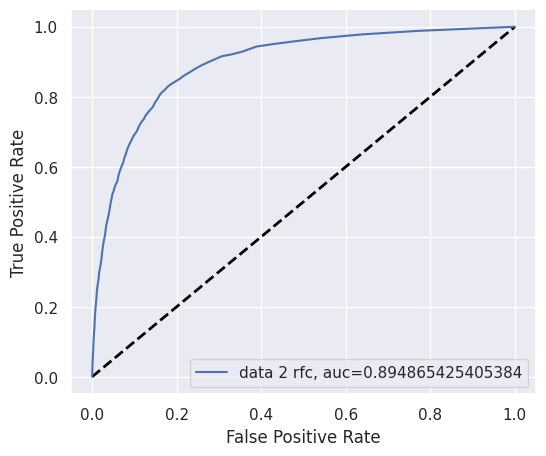

In [67]:
#AUC Random Forest 2
y_pred_proba = rfc_oversampling.predict_proba(X_test)[:,1]
sns.set(rc = {'figure.figsize':(6, 5)})
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
plt.plot(fpr,tpr,label="data 2 rfc, auc="+str(auc))
plt.xlabel('False Positive Rate', fontsize = 12)
plt.ylabel('True Positive Rate', fontsize = 12)
plt.legend(loc=4)
plt.savefig('ROC.jpg', bbox_inches='tight')
plt.show()

In [68]:
#Klasifikasi Random Forest 3 dengan undersampling
rfc_undersampling = RandomForestClassifier(random_state = 0)
rfc_undersampling.fit(X_train_RUS, y_train_RUS)
y_pred_rfc_undersampling = rfc_undersampling.predict(X_test)

In [69]:
#Evaluasi Random Forest 3 dengan undersampling
print(confusion_matrix(y_pred_rfc_undersampling, y_test))
print(classification_report(y_test, y_pred_rfc_undersampling))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rfc_undersampling))
print("Precision:",metrics.precision_score(y_test, y_pred_rfc_undersampling))
print("Recall:",metrics.recall_score(y_test, y_pred_rfc_undersampling))
print ("F1 score:", metrics.f1_score(y_test, y_pred_rfc_undersampling))
print('Cross Validation mean:',(cross_val_score(rfc, X_train, y_train, cv=5, n_jobs=2, scoring = 'accuracy').mean()))

[[14301   388]
 [ 3299  1905]]
              precision    recall  f1-score   support

           0       0.97      0.81      0.89     17600
           1       0.37      0.83      0.51      2293

    accuracy                           0.81     19893
   macro avg       0.67      0.82      0.70     19893
weighted avg       0.90      0.81      0.84     19893

Accuracy: 0.8146584225606998
Precision: 0.36606456571867796
Recall: 0.8307893589184474
F1 score: 0.508203281312525
Cross Validation mean: 0.90113611907493


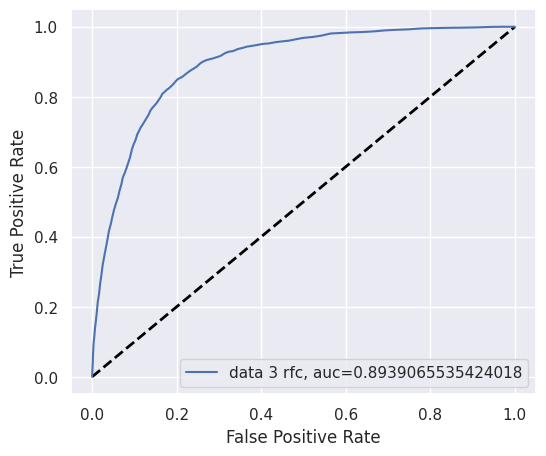

In [70]:
#AUC Random Forest 3
y_pred_proba = rfc_undersampling.predict_proba(X_test)[:,1]
sns.set(rc = {'figure.figsize':(6, 5)})
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
plt.plot(fpr,tpr,label="data 3 rfc, auc="+str(auc))
plt.xlabel('False Positive Rate', fontsize = 12)
plt.ylabel('True Positive Rate', fontsize = 12)
plt.legend(loc=4)
plt.savefig('ROC.jpg', bbox_inches='tight')
plt.show()